# KNN Regression

### KNN Regression using Salary Data Set (also comparison with Lin Reg)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

print('Pandas version :', pd.__version__)
print('Numpy version  :', np.__version__)
print('Matplot version:', matplotlib.__version__);
print('Seaborn version:', sns.__version__)
print('Sklearn version:', sk.__version__)

print('--------------')
print(pd.Timestamp.now())

Pandas version : 2.2.2
Numpy version  : 1.26.4
Matplot version: 3.9.2
Seaborn version: 0.13.2
Sklearn version: 1.5.1
--------------
2025-03-14 09:41:48.132328


In [3]:
def whatis(d):
    print("Type : ", type(d))
    print("Shape: ", d.shape)

In [4]:
df = pd.read_csv('../Data/Salary_Data.csv')
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


(   YearsExperience   Salary
 0              1.1  39343.0
 1              1.3  46205.0
 2              1.5  37731.0
 3              2.0  43525.0
 4              2.2  39891.0,
 None)

In [5]:
X=pd.DataFrame(df.YearsExperience)
y=df.Salary

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
whatis(X_train)

Type :  <class 'pandas.core.frame.DataFrame'>
Shape:  (19, 1)


<Axes: xlabel='YearsExperience', ylabel='Salary'>

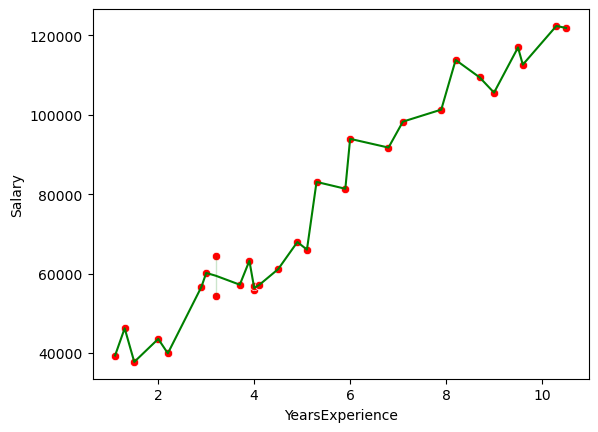

In [7]:
sns.scatterplot(x=df.YearsExperience, y=df.Salary, c='red')
sns.lineplot(x=df.YearsExperience, y=df.Salary, c='green')

## Simple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
y_preds = lm.predict(X_test)
residuals = y_test - y_preds

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# variance of the target explained by the independent variables.
# how well the model fits the data. Higher is better.
r2 = r2_score(y_test, y_preds) 

# Average squared distance between predicted and actual values
# Lower is better  (outliers will exegarate this)
mse = mean_squared_error(y_test, y_preds)

# Average absolute distance between predicted and actual values
# Lower is better
mae = mean_absolute_error(y_test, y_preds)

# Starting point of the regression line on the y-axis.
# value of target when independent variables are at zero
intercept = lm.intercept_

print('R2   : %14.4f' %r2)  
print('MSE  : %14.4f' %mse)
print('RMSE : %14.4f' %math.sqrt(mse))
print('MAE  : %14.4f' %mae)
print('Int  : %14.4f' %intercept)
print('Coef : %14.4f' %lm.coef_[0])
print('Score: %14.4f' %lm.score(X_test, y_test))

R2   :         0.9589
MSE  :  35766147.2540
RMSE :      5980.4805
MAE  :      5123.5217
Int  :     26357.1769
Coef :      9289.0391
Score:         0.9589


## KNN Regression

### SUPER IMPORTANT - you must scale (Standarize) your data!!

### The scaler is ONLY fit on the training set to avoid data leakage from the test set. 

### Once it's fit, we do the TRANSFORM FOR BOTH training and testing

In [14]:
print('BEFORE SCALING')
print(30*'-')
X_train.mean(), X_train.std()

BEFORE SCALING
------------------------------


(YearsExperience    5.168421
 dtype: float64,
 YearsExperience    2.725406
 dtype: float64)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()

# fit based ONLY on training features 
scaler.fit(X_train)

# transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print('AFTER SCALING')
print(30*'-')
X_train_scaled.mean(), X_train_scaled.std()

AFTER SCALING
------------------------------


(-1.9867148861713328e-16, 0.9999999999999999)

## specify K

In [55]:
k = 3

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [56]:
y_preds_knn = knn.predict(X_test_scaled)
residuals = y_test - y_preds

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# variance of the target explained by the independent variables.
# how well the model fits the data. Higher is better.
r2 = r2_score(y_test, y_preds_knn) 

# Average squared distance between predicted and actual values
# Lower is better  (outliers will exaggerate this)
mse = mean_squared_error(y_test, y_preds_knn)

# Average absolute distance between predicted and actual values
# Lower is better
mae = mean_absolute_error(y_test, y_preds_knn)

print('Stats for K=%d' %k)
print('R2   : %14.4f' %r2)  # same as linreg.score()
print('MAE  : %14.4f' %mae)
print('MSE  : %14.4f' %mse)
print('RMSE : %14.4f\n' %math.sqrt(mse))
print('Int  : %14.4f' %intercept)
print('Score: %14.4f' %knn.score(X_test_scaled, y_test))

Stats for K=3
R2   :         0.9617
MAE  :      4758.0303
MSE  :  33332498.4949
RMSE :      5773.4304

Int  :     26357.1769
Score:         0.9617


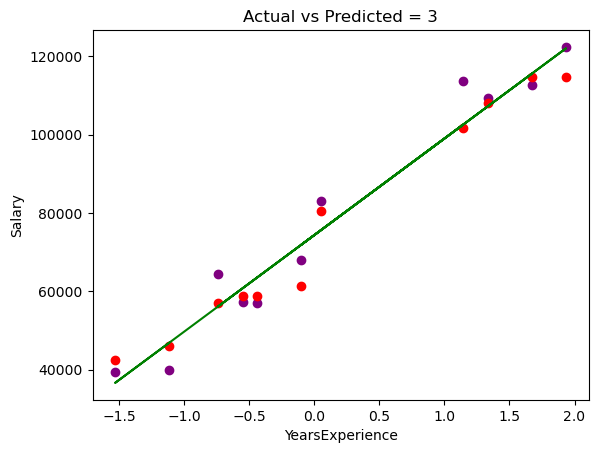

In [58]:
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted = %d' %k)

plt.scatter(X_test_scaled, y_test, c='purple') ## real/actual data
#plt.scatter(X_test_scaled, y_preds, color='green') ## LR predictions - should be on the line
plt.plot(X_test_scaled, y_preds, color='green')  ## green line

plt.scatter(X_test_scaled, y_preds_knn, color='red')

In [59]:
k_vals = range(1, 15)  # Testing k from 1 to 15
scores = []

for k in k_vals:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_preds_knn = knn.predict(X_test_scaled)
    scores.append(r2_score(y_test, y_preds_knn))


In [60]:
print(' K        Score')
print('----------------')

for i in range(len(k_vals)):
    print('%2d => %8.4f' %(i+1, scores[i]))

 K        Score
----------------
 1 =>   0.9286
 2 =>   0.9552
 3 =>   0.9617
 4 =>   0.9476
 5 =>   0.9295
 6 =>   0.9012
 7 =>   0.8688
 8 =>   0.8621
 9 =>   0.8105
10 =>   0.7421
11 =>   0.6714
12 =>   0.5959
13 =>   0.5414
14 =>   0.4575


In [61]:
max(scores), scores.index(max(scores))+1

(0.9616724640391756, 3)